In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sms 

%matplotlib inline


In [2]:
df=pd.read_csv("airline_passengers.csv")

In [3]:
df.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [4]:
df.isnull().sum()

Month                      0
Thousands of Passengers    1
dtype: int64

In [5]:
df.tail()

,Month,Thousands of Passengers
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,International airline passengers: monthly tota...,NaN


In [6]:
df.dropna(axis=0,inplace=True)

In [7]:
df.isnull().sum()

Month                      0
Thousands of Passengers    0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    144 non-null    object 
 1   Thousands of Passengers  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.4+ KB


In [9]:
df['Month']=pd.to_datetime(df['Month'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


In [11]:
df.head()

,Month,Thousands of Passengers
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


In [12]:
df.set_index('Month',inplace=True)

In [13]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


<Axes: xlabel='Month'>

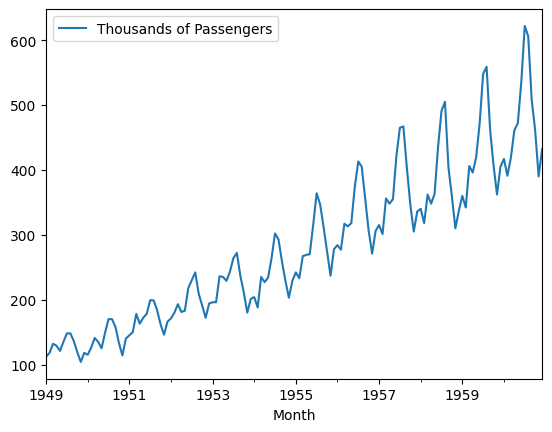

In [14]:
df.plot()

In [15]:
from statsmodels.tsa.stattools import adfuller

In [16]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [17]:
adf_test(df['Thousands of Passengers'])

ADF Statistics: 0.8153688792060482
p- value: 0.991880243437641
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [18]:
# From above p value, we can say that the data is not stationary
# To make stationary, we use Techniques Differencing 
df['Passengers First Difference']= df['Thousands of Passengers']-df['Thousands of Passengers'].shift(1)

In [19]:
df.head()

,Thousands of Passengers,Passengers First Difference
Month,,
1949-01-01,112.0,NaN
1949-02-01,118.0,6.0
1949-03-01,132.0,14.0
1949-04-01,129.0,-3.0
1949-05-01,121.0,-8.0


In [20]:
adf_test(df['Passengers First Difference'].dropna())

ADF Statistics: -2.8292668241699994
p- value: 0.0542132902838255
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [23]:
# From above P value again it is not stationary
# We have to do Second Differencing Using Differenece Technique
df['passengers second difference']=df['Passengers First Difference']-df['Passengers First Difference'].shift(1)

In [24]:
adf_test(df['passengers second difference'].dropna())

ADF Statistics: -16.384231542468505
p- value: 2.7328918500142407e-29
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [25]:
## since the data is seasonal 
# use techniques Differencing 
df['passengers 12 difference']=df['Thousands of Passengers']-df['Thousands of Passengers'].shift(12)


In [26]:
adf_test(df['passengers 12 difference'].dropna())

ADF Statistics: -3.383020726492481
p- value: 0.011551493085514954
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [27]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

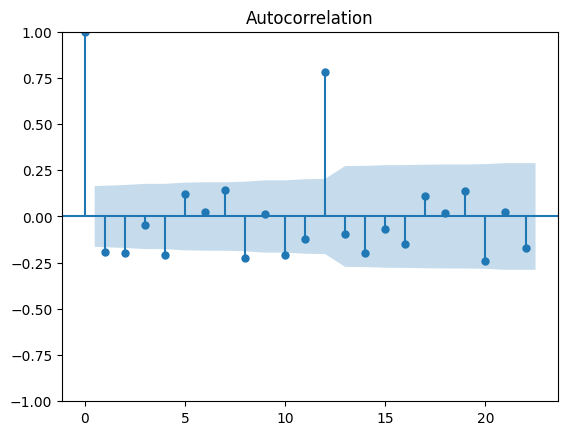

In [30]:
acf = plot_acf(df['passengers second difference'].dropna())

##### From above graph we can select "q" value i.e q=12 because we can see max effect is happening after 12 intervals

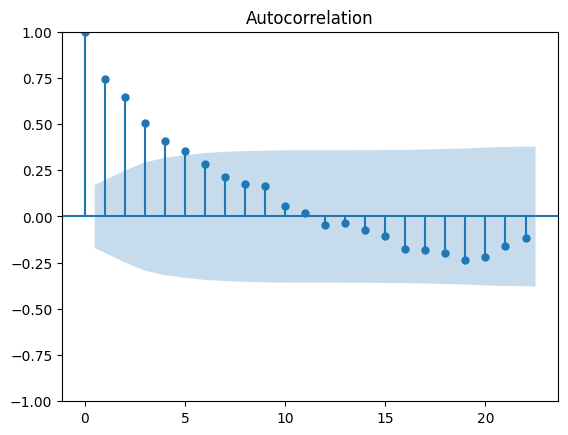

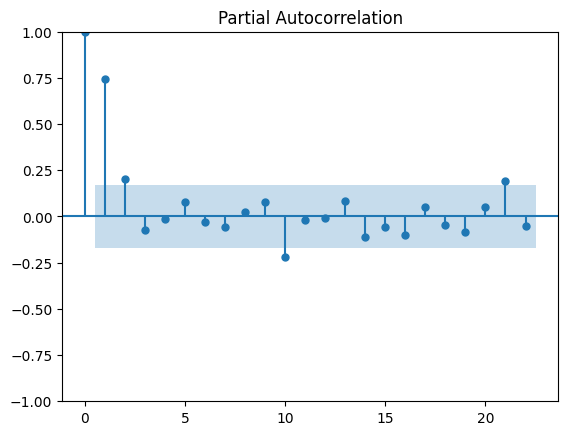

In [31]:
acf12 = plot_acf(df["passengers 12 difference"].dropna())
pacf12 = plot_pacf(df["passengers 12 difference"].dropna())

##### From above Partial Auto correlation graph, we can first select P=2, try out if doesn't work well, go with p=10

##### With ACF we are performing Moving Average(MA IN ARIMA="AR","I","MA")......WE get here q value
##### From AR we get P value


In [32]:
df

,Thousands of Passengers,Passengers First Difference,passengers second difference,passengers 12 difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1960-08-01,606.0,-16.0,-103.0,47.0
1960-09-01,508.0,-98.0,-82.0,45.0
1960-10-01,461.0,-47.0,51.0,54.0


In [33]:
# split the data into train and test
from datetime import datetime,timedelta
train_dataset_end=datetime(1955,12,1)
test_dataset_end=datetime(1960,12,1)


In [34]:
train_data=df[:train_dataset_end]
test_data=df[train_dataset_end+timedelta(days=1):test_dataset_end]

In [35]:

##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [36]:

test_data

,Thousands of Passengers,Passengers First Difference,passengers second difference,passengers 12 difference
Month,,,,
1956-01-01,284.0,6.0,-35.0,42.0
1956-02-01,277.0,-7.0,-13.0,44.0
1956-03-01,317.0,40.0,47.0,50.0
1956-04-01,313.0,-4.0,-44.0,44.0
1956-05-01,318.0,5.0,9.0,48.0
1956-06-01,374.0,56.0,51.0,59.0
1956-07-01,413.0,39.0,-17.0,49.0
1956-08-01,405.0,-8.0,-47.0,58.0
1956-09-01,355.0,-50.0,-42.0,43.0


In [37]:
## create a ARIMA model
from statsmodels.tsa.arima_model import ARIMA



In [38]:
train_data

,Thousands of Passengers,Passengers First Difference,passengers second difference,passengers 12 difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1955-08-01,347.0,-17.0,-66.0,54.0
1955-09-01,312.0,-35.0,-18.0,53.0
1955-10-01,274.0,-38.0,-3.0,45.0


In [44]:
!pip install pmdarima


   ---------------------------------------- 0.0/614.7 kB ? eta -:--:--
   - ------------------------------------- 30.7/614.7 kB 435.7 kB/s eta 0:00:02
   ------- -------------------------------- 122.9/614.7 kB 1.4 MB/s eta 0:00:01
   ------------ --------------------------- 194.6/614.7 kB 1.3 MB/s eta 0:00:01
   ------------------------- -------------- 389.1/614.7 kB 2.4 MB/s eta 0:00:01
   ---------------------------------------- 614.7/614.7 kB 3.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ------- -------------------------------- 0.5/2.8 MB 10.7 MB/s eta 0:00:01
   --------------- ------------------------ 1.1/2.8 MB 11.3 MB/s eta 0:00:01
   ---------------- ----------------------- 1.1/2.8 MB 10.3 MB/s eta 0:00:01
   ---------------- ----------------------- 1.1/2.8 MB 10.3 MB/s eta 0:00:01
   ------------------ --------------------- 1.3/2.8 MB 6.0 MB/s eta 0:00:01
   ------------------- -------------------- 1.3/2.8 MB 5.6 MB/s eta 0:00:01



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\ajays\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [50]:
import pmdarima as pm

model_ARIMA = pm.ARIMA(order=(10, 2, 0))

In [51]:
# Fit the model to your data
model_ARIMA_fit = model_ARIMA.fit(train_data['Thousands of Passengers'])

C:\Users\ajays\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ajays\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [53]:
# Optionally, you can print a summary of the model
print(model_ARIMA_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   84
Model:              SARIMAX(10, 2, 0)   Log Likelihood                -357.237
Date:                Fri, 23 Aug 2024   AIC                            738.475
Time:                        19:45:18   BIC                            767.356
Sample:                    01-01-1949   HQIC                           750.070
                         - 12-01-1955                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0999      2.496      0.040      0.968      -4.792       4.992
ar.L1         -0.5164      0.121     -4.260      0.000      -0.754      -0.279
ar.L2         -0.7203      0.125     -5.758      0.0

In [81]:
## Prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [82]:
pred=model_ARIMA_fit.predict(start=pred_start_date,end=pred_end_date)
residuals = pd.DataFrame(model_ARIMA_fit.resid())

In [83]:
residuals

,0
Month,
1949-01-01,111.983831
1949-02-01,-50.035480
1949-03-01,7.968727
1949-04-01,-15.255141
1949-05-01,-7.559937
...,...
1955-08-01,-16.466580
1955-09-01,-19.614476
1955-10-01,-20.822910


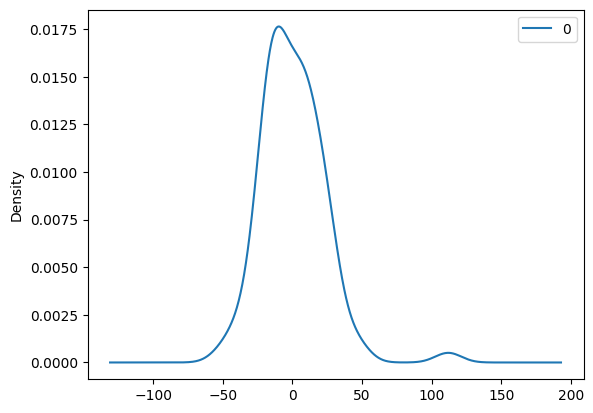

In [84]:
# Plotting the residuals using KDE
residuals.plot(kind='kde')
plt.show()

In [85]:

test_data['Predicted_ARIMA']=pred

C:\Users\ajays\AppData\Local\Temp\ipykernel_17212\155730148.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_ARIMA']=pred


<Axes: xlabel='Month'>

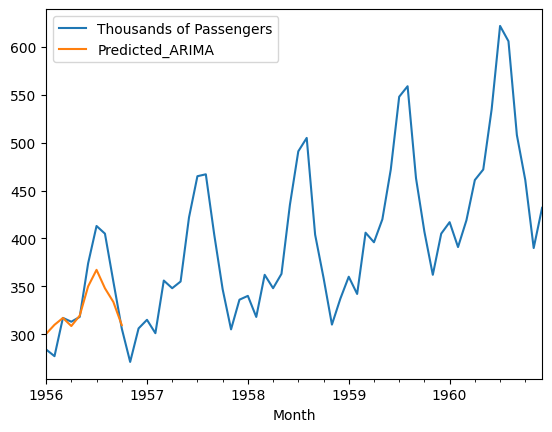

In [86]:
test_data[['Thousands of Passengers','Predicted_ARIMA']].plot()